In [39]:
from datasets import load_dataset

In [40]:
ds = load_dataset("Mir-2002/python_code_docstring_ast_corpus")

In [41]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.DataFrame(ds['train'])
print(f'Columns: {df.columns.tolist()}')
print(f'Shape: {df.shape}')

Columns: ['library', 'name', 'source_code', 'docstring', 'type', 'file_path', 'ast_data']
Shape: (24175, 7)


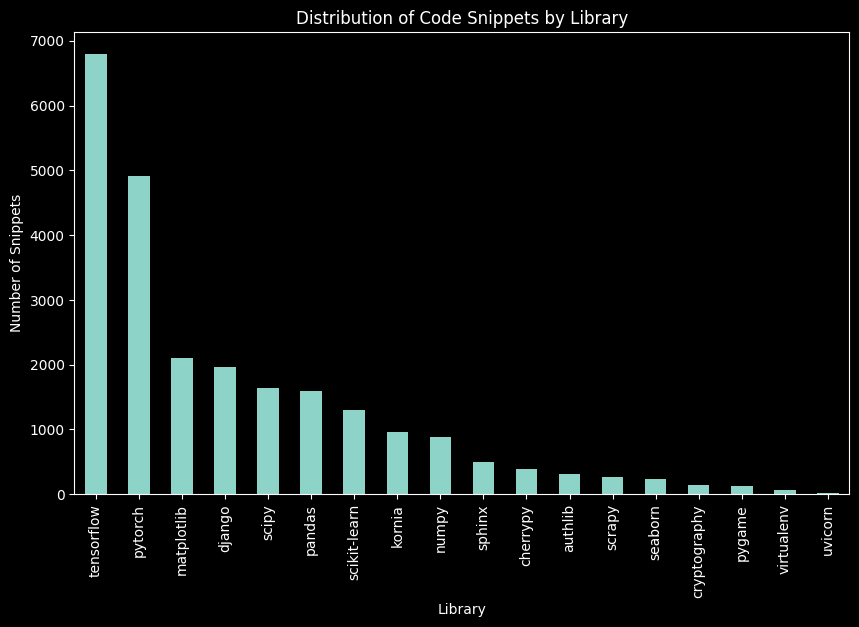

In [43]:
# show distribution of code snippet by library
library_counts = df['library'].value_counts()
plt.figure(figsize=(10, 6))
library_counts.plot(kind='bar')
plt.title('Distribution of Code Snippets by Library')
plt.xlabel('Library')
plt.ylabel('Number of Snippets')
plt.show()

In [44]:
df.head(50)

,library,name,source_code,docstring,type,file_path,ast_data
0,django,is_counterclockwise,@property\ndef is_counterclockwise(self):\n ...,Return whether this coordinate sequence is cou...,method,django\django\contrib\gis\geos\coordseq.py,FunctionDef name:is_counterclockwise arg:self ...
1,scrapy,from_settings,def from_settings(settings):\n pass,Return an instance of the class for the given ...,method,scrapy\scrapy\interfaces.py,FunctionDef name:from_settings arg:settings ar...
2,scipy,_matvec,"def _matvec(self, x):\n x = x.reshape(self....",Construct matrix-free callable banded-matrix-v...,method,scipy\scipy\sparse\linalg\_special_sparse_arra...,FunctionDef name:_matvec arg:self arg:x argume...
3,scipy,hilbert,def hilbert(n):\n values = 1.0 / (1.0 + np....,Create a Hilbert matrix of order . Returns the...,function,scipy\scipy\linalg\_special_matrices.py,FunctionDef name:hilbert arg:n arguments arg A...
4,tensorflow,RegressionOutput,class RegressionOutput(ExportOutput):\n\n d...,Represents the output of a regression head.,class,tensorflow\tensorflow\python\saved_model\model...,ClassDef name:RegressionOutput FunctionDef nam...
5,pytorch,_unregister_deepcopy_hook,"def _unregister_deepcopy_hook(self, f):\n a...",Takes a callable which was previously register...,method,pytorch\torch\fx\graph_module.py,FunctionDef name:_unregister_deepcopy_hook arg...
6,pytorch,is_embedding_node,def is_embedding_node(node: Node) -> bool:\n ...,Check if a node is an embedding node,method,pytorch\torch\fx\experimental\accelerator_part...,FunctionDef name:is_embedding_node arg:node ar...
7,pytorch,_wait_for_computation_stream,def _wait_for_computation_stream(computation_s...,Has the unshard and pre-unshard streams wait f...,function,pytorch\torch\distributed\fsdp\_runtime_utils.py,FunctionDef name:_wait_for_computation_stream ...
8,pytorch,_is_compiled,def _is_compiled() -> bool:\n return hasatt...,Return true if compile with CUDA support.,function,pytorch\torch\cuda\__init__.py,FunctionDef name:_is_compiled arguments Return...
9,matplotlib,get_bbox_to_anchor,def get_bbox_to_anchor(self):\n if self._bb...,Return the bbox that the box is anchored to.,method,matplotlib\lib\matplotlib\offsetbox.py,FunctionDef name:get_bbox_to_anchor arg:self a...


In [49]:
def generate_dataset(dataset, output_file="test_dataset.json", sample_size=50):
    """
    Downloads samples from the Hugging Face dataset and saves them to a local JSON file.
    """
    # Take the specified number of samples
    sample_data = list(dataset.take(sample_size))

    prepared_data = []
    for item in sample_data:
        # Check for keys (code/docstring are the expected keys for this corpus)
        if 'source_code' in item and 'docstring' in item:
            prepared_data.append({
                "source_code": item['source_code'],  # The input code
                "docstring": item['docstring']  # The expected docstring
            })

    # Save to JSON
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(prepared_data, f, indent=2)

    print(f"Saved {len(prepared_data)} samples to {output_file}")

In [50]:
generate_dataset(ds['train'], sample_size=50)

Saved 50 samples to test_dataset.json
